#Machine learning - lab2

#Ex. 1 - Usuwanie błędów danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Generowanie danych losowych z rozkładu normalnego
np.random.seed(42)
data = {
    'A': np.random.normal(5, .5, 100),
    'B': np.random.normal(0, 200, 100)
}

In [2]:
#Dodanie wartości odstających (outliers) do danych
outliers = [40.5, 50.0, None, -4.0]
data['A'] = np.concatenate((data['A'], outliers))
data['B'] = np.concatenate((data['B'], outliers))

In [3]:
#Tworzenie ramki danych i czyszczenie danych
df = pd.DataFrame(data)

df_cleaned = df.dropna()
print(df_cleaned)

            A           B
0    5.248357 -283.074148
1    4.930868  -84.129065
2    5.323844  -68.542903
3    5.761515 -160.455454
4    4.882923  -32.257142
..        ...         ...
98   5.002557   11.641744
99   4.882706  -228.59406
100      40.5        40.5
101      50.0        50.0
103      -4.0        -4.0

[103 rows x 2 columns]


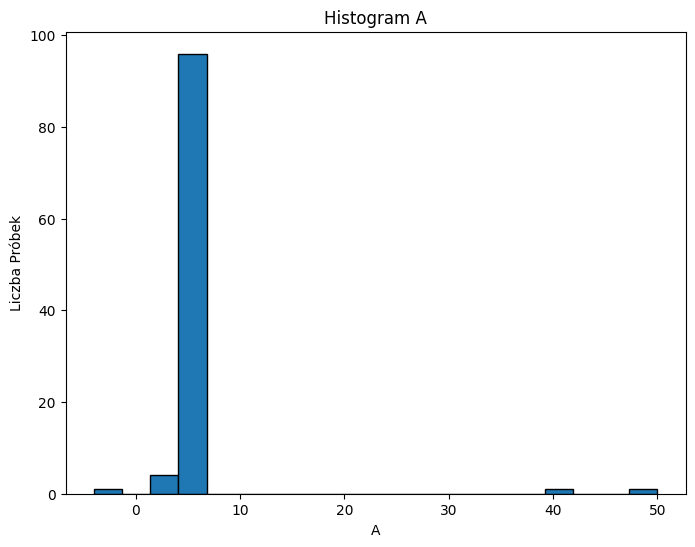

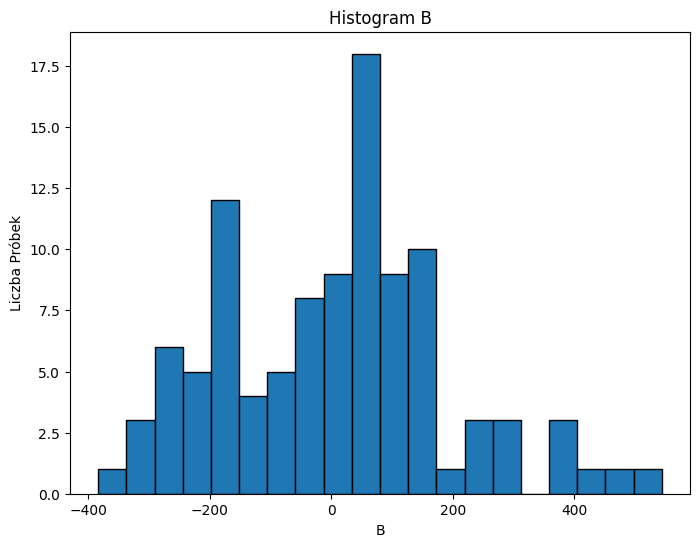

In [4]:
#Histogram

def histogram(feature, data):
    plt.figure(figsize=(8,6))
    plt.hist(data[feature], bins=20, edgecolor='k')
    plt.xlabel(feature)
    plt.ylabel('Liczba Próbek')
    plt.title(f'Histogram {feature}')
    plt.show()

histogram("A", df_cleaned)
histogram('B', df_cleaned)

In [5]:
#Wartość średnia odchylenie standardowe

mean = df_cleaned.mean()
std = df_cleaned.std()
print("Średnia: ")
print(mean)
print("Odchylenie standardowe: ")
print(std)

Średnia: 
A    5.643764
B    5.170794
dtype: object
Odchylenie standardowe: 
A       5.72597
B    187.996426
dtype: object


In [6]:
#Usuwanie wartości odstających
limits = {
    'A': [mean['A'] - (3*std['A']), mean['A'] + (3*std['A'])],
    'B': [mean['B'] - (3*std['B']), mean['B'] + (3*std['B'])]
}
df_cleaned = df_cleaned[(df_cleaned['A'] >= limits['A'][0]) & (df_cleaned['A'] <= limits['A'][1])]
df_cleaned = df_cleaned[(df_cleaned['B'] >= limits['B'][0]) & (df_cleaned['B'] <= limits['B'][1])]

print(df_cleaned)

            A           B
0    5.248357 -283.074148
1    4.930868  -84.129065
2    5.323844  -68.542903
3    5.761515 -160.455454
4    4.882923  -32.257142
..        ...         ...
96    5.14806 -176.771487
97   5.130528   30.745021
98   5.002557   11.641744
99   4.882706  -228.59406
103      -4.0        -4.0

[101 rows x 2 columns]


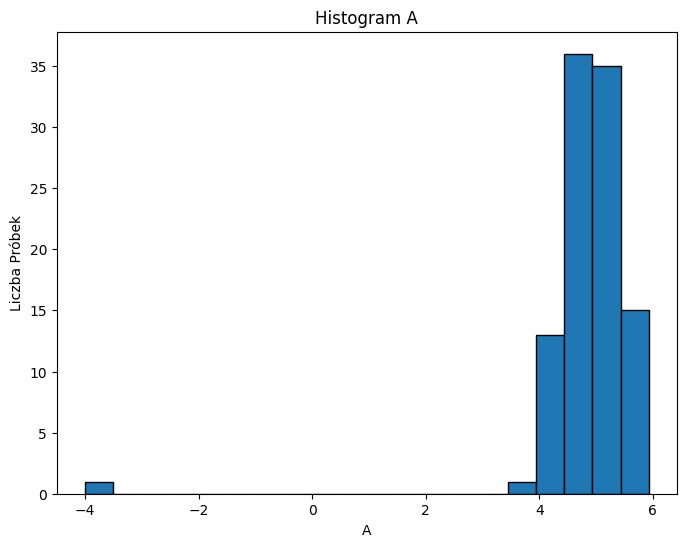

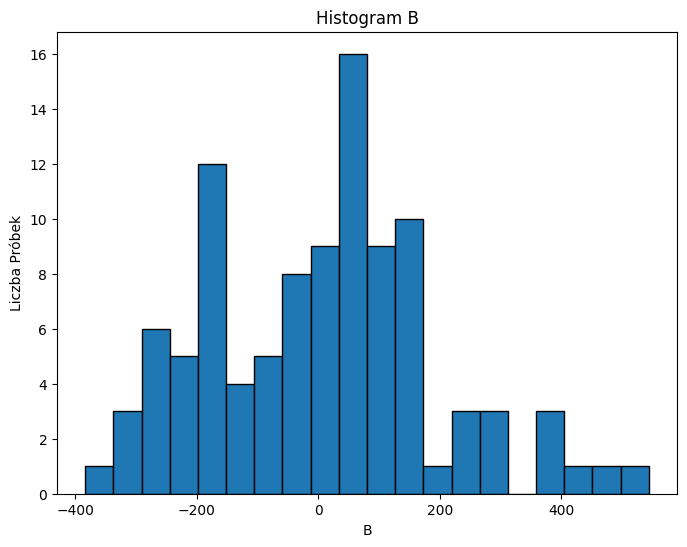

In [7]:
histogram("A", df_cleaned)
histogram('B', df_cleaned)

#Ex. 2 - Standaryzacja danych

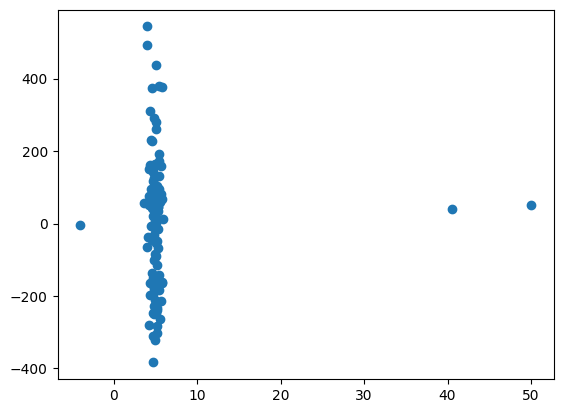

In [8]:
#Scatterplot przed standaryzacją

plt.scatter(df['A'], df['B'])
plt.show()

In [9]:
#Standaryzacja
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cleaned[['A', 'B']] = scaler.fit_transform(df_cleaned[['A', 'B']])

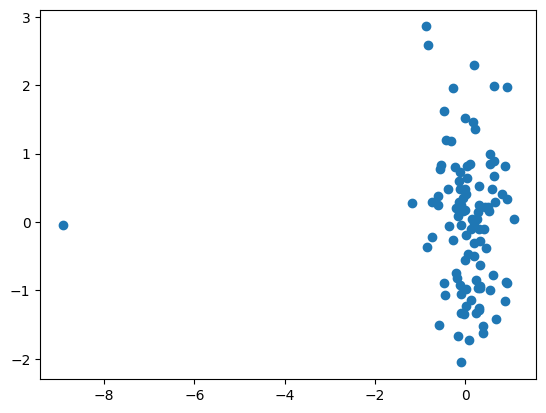

In [10]:
#Scatterplot po standaryzacji

plt.scatter(df_cleaned['A'], df_cleaned['B'])
plt.show()